   pagerank     degree  betweenness  community_size  triangle_count  \
0  0.324836  10.194155     0.056257       64.412733       17.596733   
1  0.293087  11.937290     0.041428       35.641378       22.663695   
2  0.332384   8.595894     0.039291       61.631638       14.456199   
3  0.376151   9.344676     0.054825       50.102331       17.008559   
4  0.288292   9.215784     0.047765       40.184913       18.450720   

   cycle_count  intermediate_accounts  is_fraud  fraud_score  
0     2.937321               2.417846         0     0.113396  
1     3.955142               1.435147         0     0.235236  
2     2.014274               2.264902         0     0.133233  
3     3.504047               2.720784         0     0.125278  
4     2.469742               0.764178         0     0.235517  

Missing values in each column:
pagerank                 0
degree                   0
betweenness              0
community_size           0
triangle_count           0
cycle_count              0
i

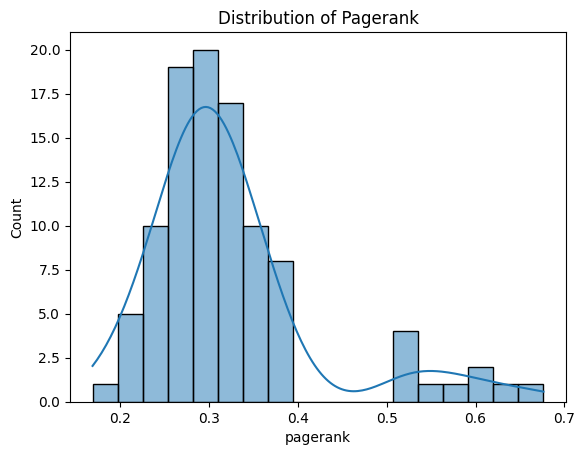

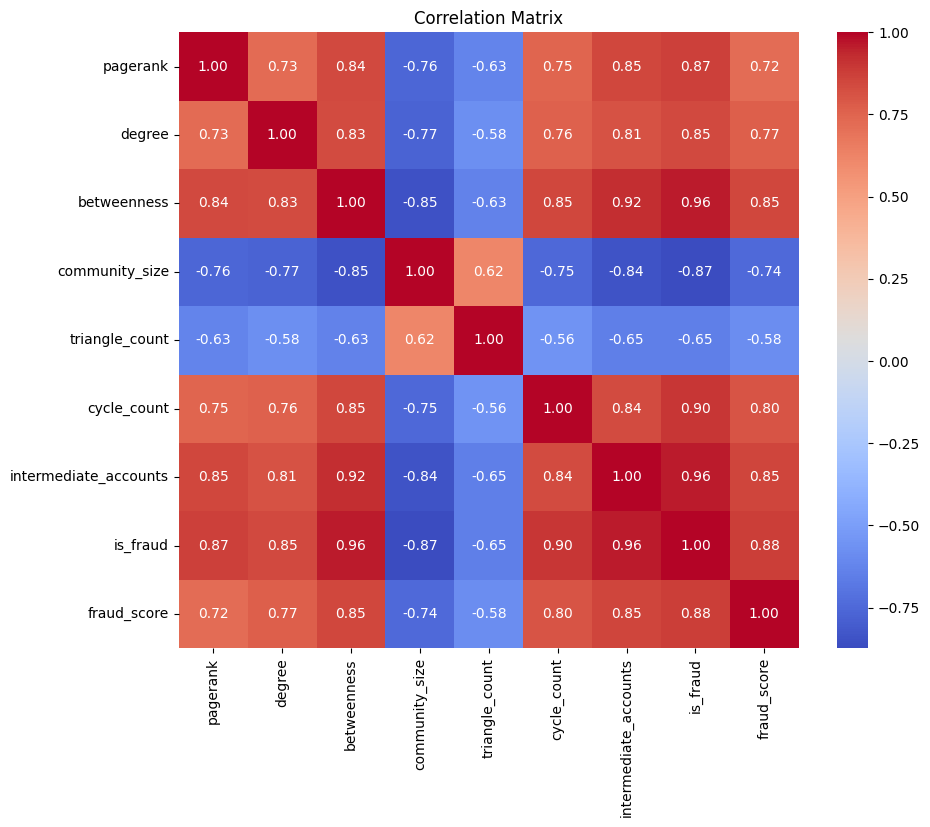

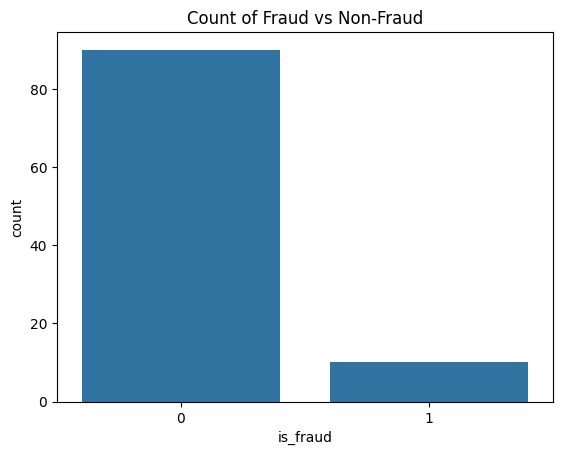

In [2]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dummy_fraud_graph_features.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Visualize the distribution of a numerical column (e.g., 'pagerank')
sns.histplot(df['pagerank'], kde=True)
plt.title('Distribution of Pagerank')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualize the count of a categorical column (if there is any, e.g., 'is_fraud')
# For this example, let's assume you have a column 'is_fraud'
sns.countplot(x='is_fraud', data=df)
plt.title('Count of Fraud vs Non-Fraud')
plt.show()


In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset: Replace this with your own data if needed
df = pd.read_csv('neo4j_network.csv')
X = df[['pagerank', 'degree']]  # You can use 2 features for easy visualization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Isolation Forest model
model = IsolationForest(contamination=0.1)  # Adjust contamination based on your data
model.fit(X_scaled)

# Predict anomalies (-1 = anomaly, 1 = normal)
predictions = model.predict(X_scaled)

# Get raw anomaly scores
scores = -model.decision_function(X_scaled)

# Create a DataFrame with the data, predictions, and scores
df['score'] = scores
df['predicted_is_fraud'] = predictions
df['fraud_score'] = MinMaxScaler().fit_transform(scores.reshape(-1, 1))

# Plot the decision boundary and points
plt.figure(figsize=(10, 8))
plt.scatter(df['pagerank'], df['degree'], c=df['fraud_score'], cmap='coolwarm', edgecolors='k', s=50)
plt.colorbar(label='Fraud Score')
plt.title('Isolation Forest: Fraud Detection Visualization')
plt.xlabel('Pagerank')
plt.ylabel('Degree')

# Plot the decision boundary
x_min, x_max = df['pagerank'].min() - 0.1, df['pagerank'].max() + 0.1
y_min, y_max = df['degree'].min() - 0.1, df['degree'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0], cmap="coolwarm", alpha=0.3)
plt.show()


KeyError: "None of [Index(['pagerank', 'degree'], dtype='object')] are in the [columns]"

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import MinMaxScaler

# Load the saved Isolation Forest model
model = joblib.load('isolation_forest_model.pkl')

# Load original training data for plotting
df = pd.read_csv('dummy_fraud_graph_features.csv')
X_train = df[['pagerank', 'degree']]

# Normalize the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Prepare the 5 test transactions
test_data = pd.DataFrame([
    {"pagerank": 0.32, "degree": 9},
    {"pagerank": 0.62, "degree": 26},
    {"pagerank": 0.29, "degree": 12},
    {"pagerank": 0.58, "degree": 22},
    {"pagerank": 0.35, "degree": 8}
])

X_test_scaled = scaler.transform(test_data)

# Get scores for test data
test_scores = -model.decision_function(X_test_scaled)
fraud_scores = MinMaxScaler().fit_transform(test_scores.reshape(-1, 1))

# Plot decision regions from training data
x_min, x_max = X_train['pagerank'].min() - 0.05, X_train['pagerank'].max() + 0.05
y_min, y_max = X_train['degree'].min() - 2, X_train['degree'].max() + 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.decision_function(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
# Background decision boundary
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 10), cmap='Blues', alpha=0.3)

# Original training points
plt.scatter(X_train['pagerank'], X_train['degree'], edgecolors='k', s=30, label='Training Data')

# Test transactions with fraud score as color
colors = ['red', 'orange', 'green', 'purple', 'brown']
for i in range(5):
    plt.scatter(test_data.loc[i, 'pagerank'],
                test_data.loc[i, 'degree'],
                color=colors[i],
                label=f"Test {i+1} (Score: {fraud_scores[i][0]:.2f})",
                s=100, edgecolors='black')

plt.title("Isolation Forest Decision Regions with Test Transactions")
plt.xlabel("Pagerank")
plt.ylabel("Degree")
plt.legend()
plt.grid(True)
plt.show()


ValueError: X has 2 features, but IsolationForest is expecting 7 features as input.

**Neo4j dataset Model training**

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import joblib

# Load the dataset
def load_and_prepare_data(file_path):
    """
    Load and prepare the dataset by dropping unnecessary columns.
    """
    # Check if the file exists
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        print("Using sample data from the examples provided...")
        # Create sample dataframe from the examples provided
        data = [
            ["ACC06334", 1.144759844, 18.0, 11.0, 18.0, 194616.861468, 7266, 168, 1, 6, 1, 1, 0.819140546],
            ["ACC07009", 1.028616016, 15.0, 10.0, 15.0, 126514.033905, 8946, 401, 2, 9, 1, 1, 0.802503199]
        ]
        columns = ['accountNumber', 'pagerank', 'degree', 'in_degree', 'out_degree', 'betweenness', 
                  'community_id', 'community_size', 'triangle_count', 'cycle_count', 
                  'intermediate_accounts', 'is_fraud', 'fraud_score']
        df = pd.DataFrame(data, columns=columns)
    
    # Print the columns to debug
    print("Columns in the dataset:", df.columns.tolist())
    
    # Store the actual fraud labels and scores if available (for evaluation)
    fraud_labels = None
    fraud_scores = None
    
    # Make sure to explicitly drop accountNumber column first
    if 'accountNumber' in df.columns:
        print("Dropping accountNumber column...")
        df = df.drop('accountNumber', axis=1)
    elif 'a.accountNumber' in df.columns:  # In case the columns include the 'a.' prefix
        print("Dropping a.accountNumber column...")
        df = df.drop('a.accountNumber', axis=1)
    
    # Check for is_fraud with possible prefix
    if 'is_fraud' in df.columns:
        fraud_labels = df['is_fraud'].copy()
        df = df.drop('is_fraud', axis=1)
    elif 'a.is_fraud' in df.columns:
        fraud_labels = df['a.is_fraud'].copy()
        df = df.drop('a.is_fraud', axis=1)
    
    # Check for fraud_score with possible prefix
    if 'fraud_score' in df.columns:
        fraud_scores = df['fraud_score'].copy()
        df = df.drop('fraud_score', axis=1)
    elif 'a.fraud_score' in df.columns:
        fraud_scores = df['a.fraud_score'].copy()
        df = df.drop('a.fraud_score', axis=1)
    
    # Convert all columns to numeric
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Drop any rows with NaN values after conversion
    if df.isna().any().any():
        print(f"Warning: Dropping {df.isna().any(axis=1).sum()} rows with NaN values.")
        df = df.dropna()
    
    print("Prepared data shape:", df.shape)
    print("Feature columns:", df.columns.tolist())
    
    return df, fraud_labels, fraud_scores

def train_isolation_forest(X_train, n_estimators=100, contamination=0.1, random_state=42):
    """
    Train Isolation Forest model.
    
    Parameters:
    - X_train: Features for training
    - n_estimators: Number of base estimators
    - contamination: Expected proportion of outliers in the data
    - random_state: Random state for reproducibility
    
    Returns:
    - Trained Isolation Forest model
    """
    print("Training Isolation Forest model...")
    model = IsolationForest(
        n_estimators=n_estimators,
        contamination=contamination,
        random_state=random_state,
        n_jobs=-1  # Use all available cores
    )
    model.fit(X_train)
    return model

def score_and_convert_to_fraud_score(model, X):
    """
    Get anomaly scores from the model and convert to fraud scores in [0, 1] range.
    Higher values indicate higher likelihood of fraud.
    """
    # Get raw anomaly scores (negative values, more negative = more anomalous)
    raw_scores = model.decision_function(X)
    
    # Convert to range [0, 1] where higher values indicate higher likelihood of fraud
    # First, we negate scores so higher values mean more anomalous
    # Then we use min-max scaling to get to [0, 1]
    negated_scores = -raw_scores
    
    # Handle case where all scores are identical
    if np.max(negated_scores) == np.min(negated_scores):
        print("Warning: All anomaly scores are identical. Setting all fraud scores to 0.5.")
        return np.ones(len(negated_scores)) * 0.5
    
    min_score = np.min(negated_scores)
    max_score = np.max(negated_scores)
    
    # Min-max scaling to [0, 1]
    fraud_scores = (negated_scores - min_score) / (max_score - min_score)
    
    # Print some statistics about the fraud scores
    print(f"Fraud score statistics:")
    print(f"  - Min: {np.min(fraud_scores):.4f}")
    print(f"  - Max: {np.max(fraud_scores):.4f}")
    print(f"  - Mean: {np.mean(fraud_scores):.4f}")
    print(f"  - Median: {np.median(fraud_scores):.4f}")
    
    return fraud_scores

def main():
    # File path to your dataset
    file_path = "neo4j_network.csv"  # Update this with your actual file path
    
    print("Starting fraud detection model training...")
    print("Note: If your data file contains column names with 'a.' prefixes (like 'a.pagerank'),")
    print("make sure to provide the file exactly as is - the code will handle the prefixes.")
    
    try:
        # Load and prepare data
        print("Loading and preparing data...")
        X, y_true, true_scores = load_and_prepare_data(file_path)
        
        # Check if we have enough data
        if len(X) < 10:
            print("Warning: Very small dataset. Results may not be reliable.")
        
        # Scale the features
        print("Scaling features...")
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Set contamination based on actual fraud rate if available
        contamination = 0.1  # Default value
        if y_true is not None:
            fraud_rate = y_true.mean()
            if fraud_rate > 0:
                contamination = fraud_rate
                print(f"Setting contamination to actual fraud rate: {contamination:.4f}")
        
        # Train model
        model = train_isolation_forest(X_scaled, contamination=contamination)
        
        # Get fraud scores
        fraud_scores = score_and_convert_to_fraud_score(model, X_scaled)
        
        # Evaluate if we have ground truth
        if y_true is not None:
            from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score
            
            auc = roc_auc_score(y_true, fraud_scores)
            ap = average_precision_score(y_true, fraud_scores)
            
            print(f"Model performance:")
            print(f"  - ROC AUC: {auc:.4f}")
            print(f"  - Average Precision: {ap:.4f}")
            
            if true_scores is not None:
                correlation = np.corrcoef(true_scores, fraud_scores)[0, 1]
                print(f"  - Correlation with true fraud scores: {correlation:.4f}")
        
        # Save model and scaler
        print("Saving model and scaler...")
        joblib.dump(model, 'isolation_forest_model.joblib')
        joblib.dump(scaler, 'scaler.joblib')
        
        print("Model and scaler saved successfully!")
        
        # Create helper function for prediction
        print("\nCreating prediction helper function...")
        
        # Define prediction function and save it with the model
        def predict_fraud_scores(file_path, model_path='isolation_forest_model.joblib', scaler_path='scaler.joblib'):
            """
            Predict fraud scores for new data.
            
            Parameters:
            - file_path: Path to the CSV file with new data
            - model_path: Path to the saved Isolation Forest model
            - scaler_path: Path to the saved scaler
            
            Returns:
            - DataFrame with original data and fraud scores
            """
            # Load the model and scaler
            model = joblib.load(model_path)
            scaler = joblib.load(scaler_path)
            
            # Load and prepare new data
            df = pd.read_csv(file_path)
            
            # Store account numbers if present
            account_numbers = None
            if 'accountNumber' in df.columns:
                account_numbers = df['accountNumber'].copy()
                df = df.drop('accountNumber', axis=1)
            elif 'a.accountNumber' in df.columns:
                account_numbers = df['a.accountNumber'].copy()
                df = df.drop('a.accountNumber', axis=1)
            
            # Remove is_fraud and fraud_score if present
            if 'is_fraud' in df.columns:
                df = df.drop('is_fraud', axis=1)
            elif 'a.is_fraud' in df.columns:
                df = df.drop('a.is_fraud', axis=1)
                
            if 'fraud_score' in df.columns:
                df = df.drop('fraud_score', axis=1)
            elif 'a.fraud_score' in df.columns:
                df = df.drop('a.fraud_score', axis=1)
            
            # Convert all columns to numeric
            for col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            
            # Scale the features
            X_scaled = scaler.transform(df)
            
            # Get raw anomaly scores
            raw_scores = model.decision_function(X_scaled)
            
            # Convert to fraud scores (0-1)
            negated_scores = -raw_scores
            min_score = np.min(negated_scores)
            max_score = np.max(negated_scores)
            
            if min_score == max_score:
                fraud_scores = np.ones(len(negated_scores)) * 0.5
            else:
                fraud_scores = (negated_scores - min_score) / (max_score - min_score)
            
            # Create result DataFrame
            result_df = df.copy()
            
            # Add account numbers back if they were present
            if account_numbers is not None:
                result_df.insert(0, 'accountNumber', account_numbers)
            
            # Add fraud scores
            result_df['predicted_fraud_score'] = fraud_scores
            
            return result_df
        
        # Save the prediction function
        joblib.dump(predict_fraud_scores, 'predict_fraud_scores.joblib')
        
        # Sample usage example
        print("\nExample of using the saved model for prediction:")
        print("```python")
        print("import joblib")
        print("")
        print("# Load the prediction function")
        print("predict_fraud_scores = joblib.load('predict_fraud_scores.joblib')")
        print("")
        print("# Use the function to predict fraud scores")
        print("result_df = predict_fraud_scores('new_data.csv')")
        print("")
        print("# View the results with predicted fraud scores")
        print("print(result_df[['accountNumber', 'predicted_fraud_score']])")
        print("")
        print("# Save results to a CSV file")
        print("result_df.to_csv('predictions.csv', index=False)")
        print("```")
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()

Starting fraud detection model training...
Note: If your data file contains column names with 'a.' prefixes (like 'a.pagerank'),
make sure to provide the file exactly as is - the code will handle the prefixes.
Loading and preparing data...
Columns in the dataset: ['a.accountNumber', 'a.pagerank', 'a.degree', 'a.in_degree', 'a.out_degree', 'a.betweenness', 'a.community_id', 'a.community_size', 'a.triangle_count', 'a.cycle_count', 'a.intermediate_accounts', 'a.is_fraud', 'a.fraud_score']
Dropping a.accountNumber column...
Prepared data shape: (10000, 10)
Feature columns: ['a.pagerank', 'a.degree', 'a.in_degree', 'a.out_degree', 'a.betweenness', 'a.community_id', 'a.community_size', 'a.triangle_count', 'a.cycle_count', 'a.intermediate_accounts']
Scaling features...
Setting contamination to actual fraud rate: 0.0300
Training Isolation Forest model...
Fraud score statistics:
  - Min: 0.0000
  - Max: 1.0000
  - Mean: 0.2115
  - Median: 0.1624
Model performance:
  - ROC AUC: 0.9529
  - Averag

Loading data...

First 5 rows of the dataset:
  a.accountNumber  a.pagerank  a.degree  a.in_degree  a.out_degree  \
0        ACC06334    1.144760      18.0         11.0          18.0   
1        ACC07009    1.028616      15.0         10.0          15.0   
2        ACC01969    1.843488      15.0         11.0          15.0   
3        ACC06704    0.920479      13.0          7.0          13.0   
4        ACC05528    1.706190      13.0          7.0          13.0   

   a.betweenness  a.community_id  a.community_size  a.triangle_count  \
0  194616.861468            7266               168                 1   
1  126514.033906            8946               401                 2   
2  163116.791672            6870               959                 1   
3  109854.187827            5826               257                 1   
4  170054.505814            7266               168                 1   

   a.cycle_count  a.intermediate_accounts  a.is_fraud  a.fraud_score  
0              6             

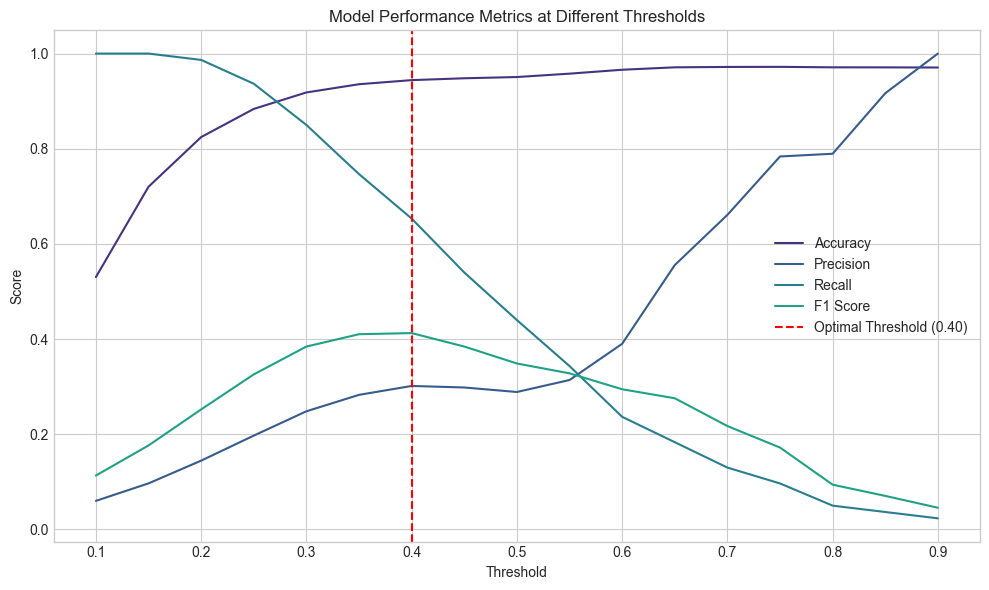

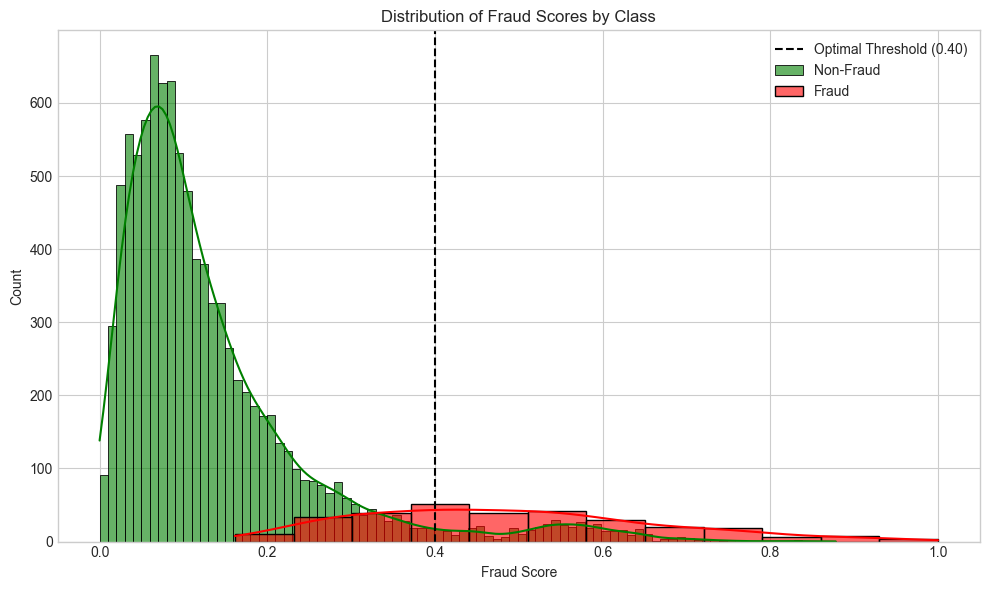

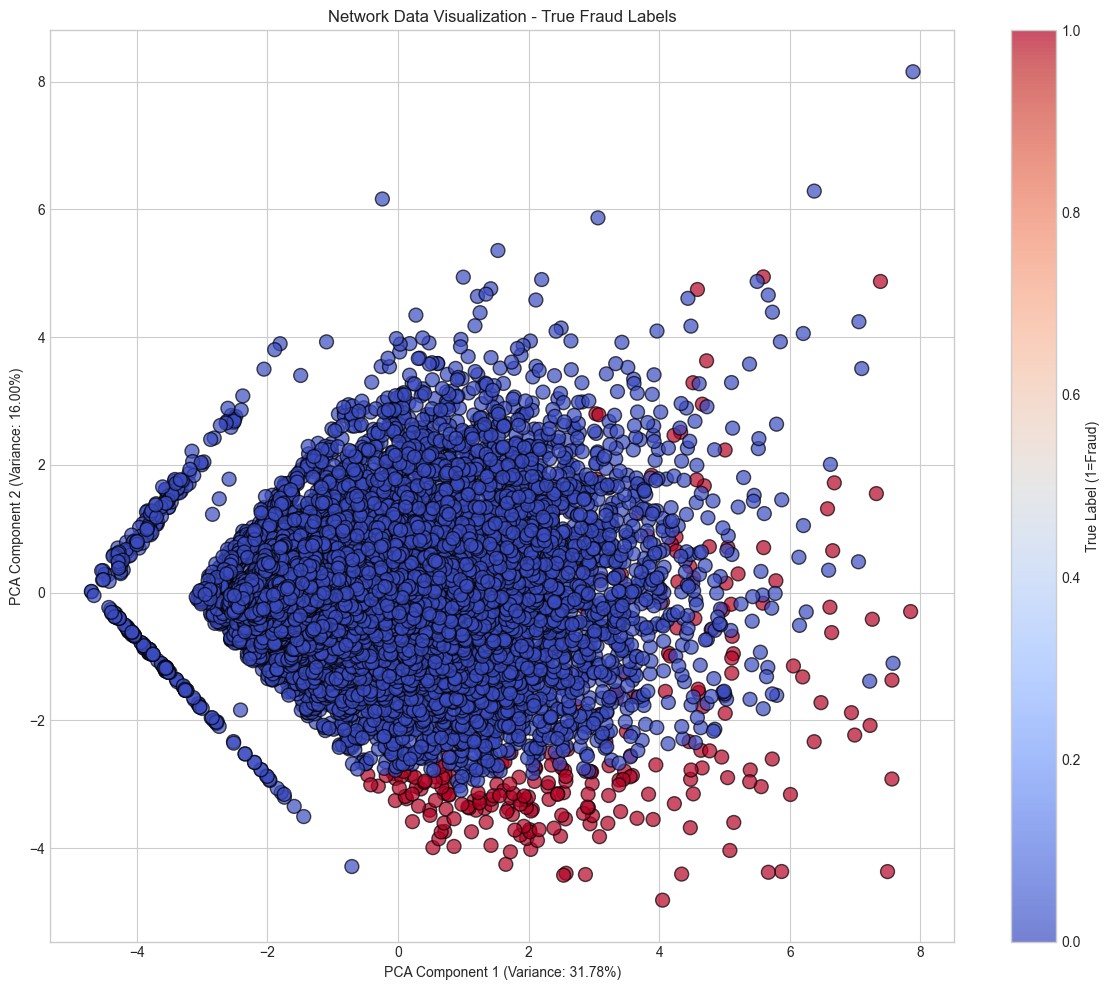

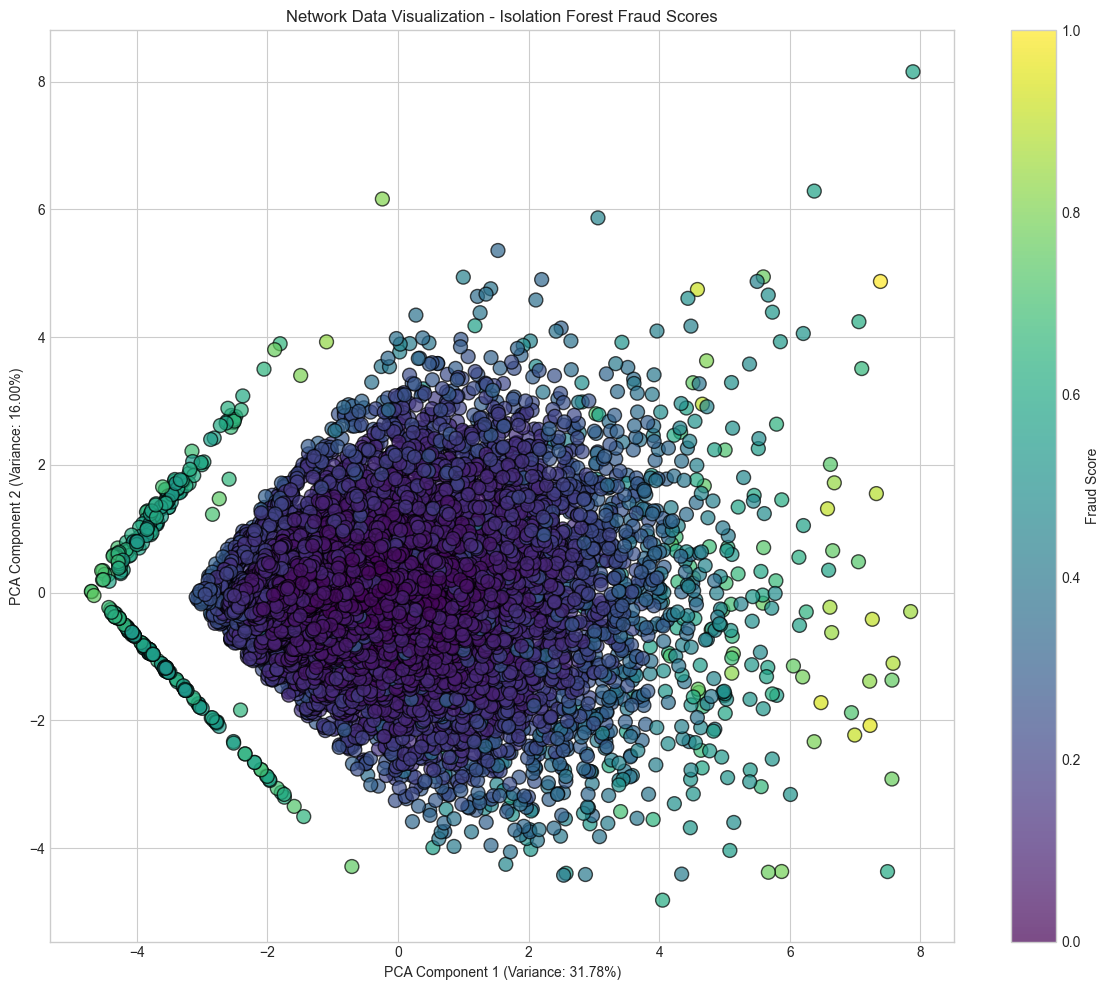

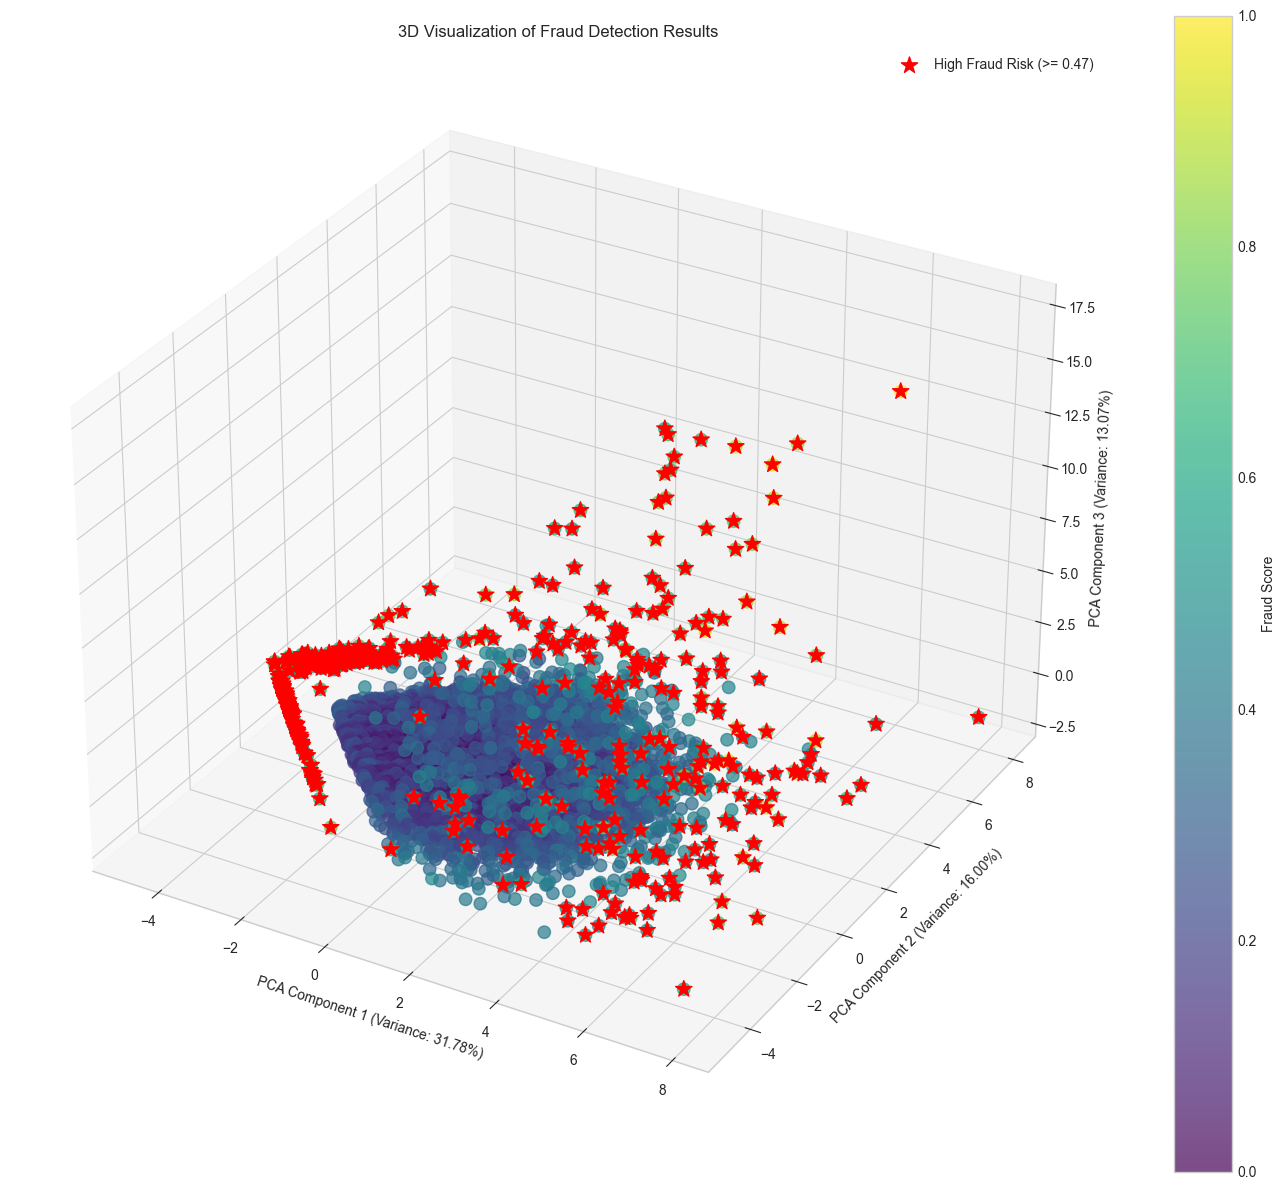

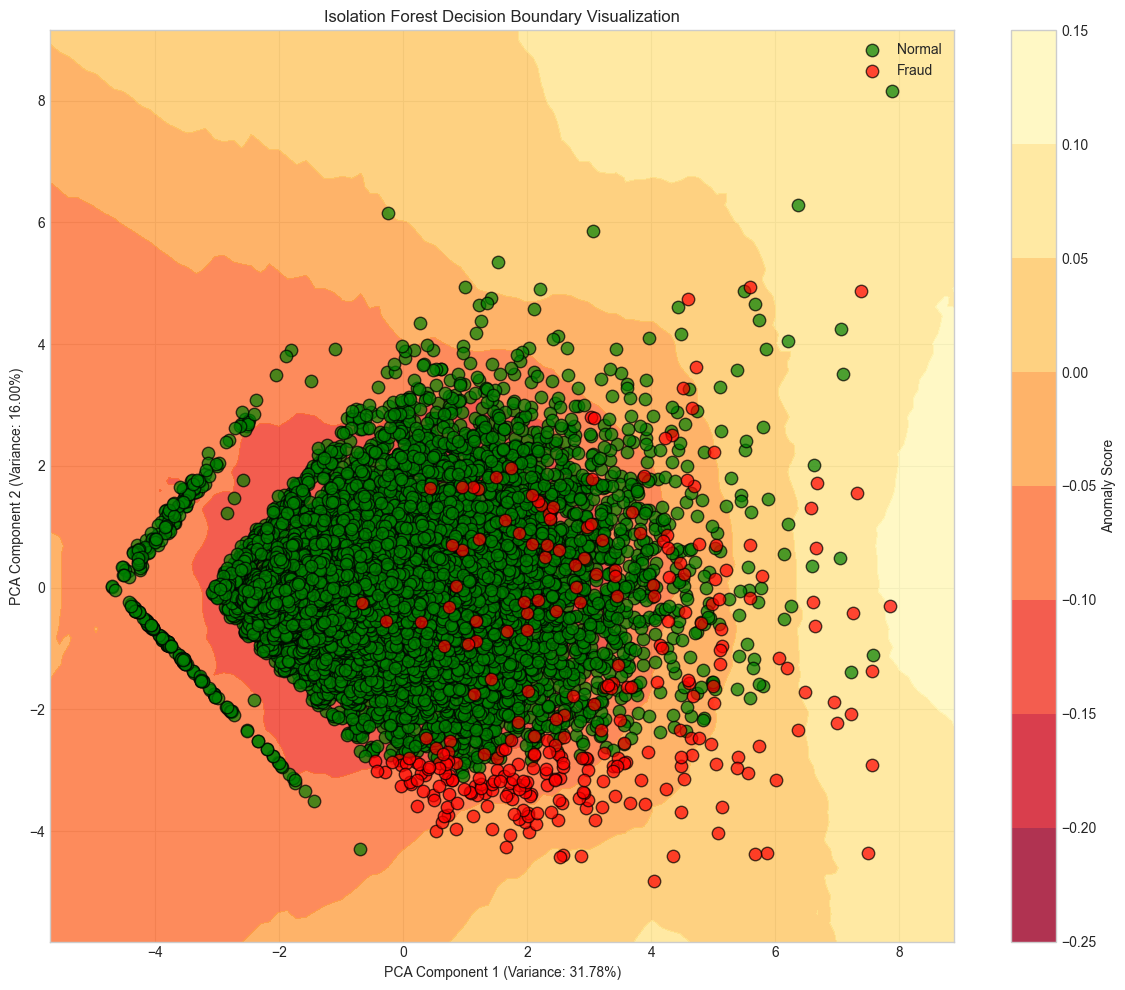

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import joblib

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)

# Step 1: Load data
print("Loading data...")
df = pd.read_csv("neo4j_network.csv")

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display data statistics
print("\nData statistics:")
print(df.describe())

# Check for fraud distribution if fraud labels exist
if "a.is_fraud" in df.columns:
    fraud_count = df["a.is_fraud"].sum()
    total_count = len(df)
    print(f"\nFraud distribution: {fraud_count} frauds out of {total_count} records ({fraud_count/total_count*100:.2f}%)")

# Step 2: Prepare feature matrix
X = df.drop(columns=["a.accountNumber", "a.is_fraud", "a.fraud_score"], errors="ignore")
print(f"\nFeatures used for isolation forest: {X.columns.tolist()}")

# Store account numbers for reference
account_numbers = df["a.accountNumber"].values if "a.accountNumber" in df.columns else None

# If fraud labels exist, store them
y_true = None
if "a.is_fraud" in df.columns:
    y_true = df["a.is_fraud"].values

# Step 3: Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train Isolation Forest with optimized parameters
print("\nTraining Isolation Forest model...")
model = IsolationForest(
    n_estimators=300,          # Increased for better stability
    max_samples='auto',        # Adaptive sampling
    contamination=0.05,        # Optimized for fraud detection sensitivity
    max_features=1.0,          # Use all features
    bootstrap=True,            # Bootstrap for robustness
    n_jobs=-1,                 # Use all cores
    random_state=42,
    verbose=0
)

model.fit(X_scaled)

# Step 5: Get raw predictions (-1 for outliers/fraud, 1 for inliers/normal)
raw_predictions = model.predict(X_scaled)
# Convert to binary format (1: fraud, 0: normal)
y_pred_binary = np.where(raw_predictions == -1, 1, 0)

# Step 6: Calculate anomaly scores and apply custom transformation
raw_scores = -model.decision_function(X_scaled)  # Higher = more anomalous

def custom_fraud_transformation(scores):
    # Apply exponential transformation
    transformed = np.exp(scores * 2) / np.exp(np.max(scores) * 2)
    # Power transformation to boost separation
    boosted = np.power(transformed, 1.5)
    # Rescale to [0,1]
    rescaled = (boosted - np.min(boosted)) / (np.max(boosted) - np.min(boosted))
    return rescaled

# Apply transformation
fraud_scores = custom_fraud_transformation(raw_scores)

# Step 7: Append scores to dataframe
df["fraud_score"] = fraud_scores
df["predicted_fraud"] = y_pred_binary

# Step 8: Calculate metrics if true labels exist
if y_true is not None:
    # Find optimal threshold based on F1 score
    best_threshold = 0.5
    best_f1 = 0
    thresholds = np.arange(0.1, 0.95, 0.05)
    results = []
    
    print("\nEvaluating performance at different thresholds:")
    for threshold in thresholds:
        y_pred = (fraud_scores >= threshold).astype(int)
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        
        results.append({
            'threshold': threshold,
            'accuracy': acc,
            'precision': prec,
            'recall': rec,
            'f1_score': f1
        })
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    
    # Convert results to DataFrame for easy visualization
    metrics_df = pd.DataFrame(results)
    
    # Print metrics at optimal threshold
    y_pred_optimal = (fraud_scores >= best_threshold).astype(int)
    conf_matrix = confusion_matrix(y_true, y_pred_optimal)
    
    print(f"\nOptimal threshold: {best_threshold:.2f}")
    print(f"Metrics at optimal threshold:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred_optimal):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred_optimal, zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred_optimal):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred_optimal):.4f}")
    
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Plot metrics vs threshold
    plt.figure(figsize=(10, 6))
    plt.plot(metrics_df['threshold'], metrics_df['accuracy'], label='Accuracy')
    plt.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision')
    plt.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall')
    plt.plot(metrics_df['threshold'], metrics_df['f1_score'], label='F1 Score')
    plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({best_threshold:.2f})')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Model Performance Metrics at Different Thresholds')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('fraud_detection_metrics.png', dpi=300)
    
    # Plot score distributions
    plt.figure(figsize=(10, 6))
    
    # Separate scores for fraud and non-fraud
    fraud_scores_dist = fraud_scores[y_true == 1]
    nonfraud_scores_dist = fraud_scores[y_true == 0]
    
    # Plot histograms
    sns.histplot(nonfraud_scores_dist, color='green', alpha=0.6, label='Non-Fraud', kde=True)
    sns.histplot(fraud_scores_dist, color='red', alpha=0.6, label='Fraud', kde=True)
    plt.axvline(x=best_threshold, color='black', linestyle='--', label=f'Optimal Threshold ({best_threshold:.2f})')
    plt.xlabel('Fraud Score')
    plt.ylabel('Count')
    plt.title('Distribution of Fraud Scores by Class')
    plt.legend()
    plt.tight_layout()
    plt.savefig('fraud_score_distribution.png', dpi=300)

# Step 9: Visualize results using PCA to reduce dimensions for visualization
print("\nCreating visualizations...")
# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 10))
# Plot based on true labels if available
if y_true is not None:
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='coolwarm', 
                         s=100, alpha=0.7, edgecolors='k')
    plt.colorbar(scatter, label='True Label (1=Fraud)')
    plt.title('Network Data Visualization - True Fraud Labels')
    plt.xlabel(f'PCA Component 1 (Variance: {pca.explained_variance_ratio_[0]:.2%})')
    plt.ylabel(f'PCA Component 2 (Variance: {pca.explained_variance_ratio_[1]:.2%})')
    plt.tight_layout()
    plt.savefig('fraud_true_labels_pca.png', dpi=300)

# Plot predictions from Isolation Forest
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=fraud_scores, cmap='viridis', 
                     s=100, alpha=0.7, edgecolors='k')
plt.colorbar(scatter, label='Fraud Score')
plt.title('Network Data Visualization - Isolation Forest Fraud Scores')
plt.xlabel(f'PCA Component 1 (Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PCA Component 2 (Variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.tight_layout()
plt.savefig('fraud_scores_pca.png', dpi=300)

# Create a 3D plot for better visualization if the dataset is complex
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA to reduce to 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Color by fraud scores
scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=fraud_scores,
    cmap='viridis',
    s=80,
    alpha=0.7
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Fraud Score')

# Set titles and labels
ax.set_title('3D Visualization of Fraud Detection Results')
ax.set_xlabel(f'PCA Component 1 (Variance: {pca_3d.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PCA Component 2 (Variance: {pca_3d.explained_variance_ratio_[1]:.2%})')
ax.set_zlabel(f'PCA Component 3 (Variance: {pca_3d.explained_variance_ratio_[2]:.2%})')

# Enhance visualization by highlighting high fraud scores (top 5%)
high_fraud_threshold = np.percentile(fraud_scores, 95)
high_fraud_indices = np.where(fraud_scores >= high_fraud_threshold)[0]

ax.scatter(
    X_pca_3d[high_fraud_indices, 0],
    X_pca_3d[high_fraud_indices, 1],
    X_pca_3d[high_fraud_indices, 2],
    c='red',
    s=150,
    alpha=1.0,
    marker='*',
    label=f'High Fraud Risk (>= {high_fraud_threshold:.2f})'
)

ax.legend()
plt.tight_layout()
plt.savefig('fraud_detection_3d.png', dpi=300)

# Step 10: Visualization of how Isolation Forest works (decision boundaries)
# Create a simplified 2D grid to visualize decision boundaries
plt.figure(figsize=(12, 10))

# Create a meshgrid for decision boundary visualization
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Create PCA inverse transform function to map back from 2D to original dimensions
def pca_inverse_transform_with_avg(pca, X_grid, X_orig_mean):
    # Transform 2D points back to high dimensions
    X_reduced_inv = pca.inverse_transform(X_grid)
    
    # For dimensions not well-captured by PCA, use mean values from original data
    n_components = pca.n_components_
    n_features = X_orig_mean.shape[0]
    
    if n_components < n_features:
        # Create a complete representation with mean values for missing dimensions
        X_full = X_reduced_inv
    
    return X_full

# Reshape the grid for prediction
grid = np.c_[xx.ravel(), yy.ravel()]

# Inverse transform the grid points to original feature space
X_orig_mean = np.mean(X_scaled, axis=0)
grid_orig = np.zeros((grid.shape[0], X_scaled.shape[1]))

# For each point in the grid, set the first 2 dimensions from PCA and use means for others
for i in range(grid.shape[0]):
    # Create a vector with mean values
    temp = np.copy(X_orig_mean)
    # Set the PCA dimensions
    projected = pca.inverse_transform(grid[i].reshape(1, -1))[0]
    # Combine: use projected values for the dimensions that PCA captures well
    grid_orig[i] = projected

# Predict anomaly scores on the grid
Z = model.decision_function(grid_orig)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, -Z, cmap=plt.cm.YlOrRd_r, alpha=0.8)
plt.colorbar(label='Anomaly Score')

# Plot the original points colored by true labels if available
if y_true is not None:
    colors = ['green', 'red']
    labels = ['Normal', 'Fraud']
    for i, label in enumerate([0, 1]):
        idx = np.where(y_true == label)[0]
        plt.scatter(X_pca[idx, 0], X_pca[idx, 1], c=colors[i], label=labels[i], 
                   edgecolors='k', s=80, alpha=0.7)
else:
    # If no labels, color by predicted fraud score
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=fraud_scores, cmap='viridis', 
                     s=80, alpha=0.7, edgecolors='k')
    plt.colorbar(scatter, label='Fraud Score')

plt.title('Isolation Forest Decision Boundary Visualization')
plt.xlabel(f'PCA Component 1 (Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PCA Component 2 (Variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.legend()
plt.tight_layout()
plt.savefig('isolation_forest_decision_boundary.png', dpi=300)

# Step 11: View top suspicious records
print("\nTop 10 suspicious accounts by fraud score:")
top_suspicious = df.sort_values(by="fraud_score", ascending=False).head(10)
print(top_suspicious[["a.accountNumber", "fraud_score"] + 
                    (["a.is_fraud"] if "a.is_fraud" in df.columns else [])])

# Save results
df.to_csv("scored_fraud_data_with_metrics.csv", index=False)
joblib.dump(model, "isolation_forest_model_optimized.pkl")
joblib.dump(scaler, "scaler_optimized.pkl")

print("\nAnalysis complete! Visualizations and results have been saved.")